Nome: Francisco Jerônimo da Silva Júnior <br>
Matrícula: 433399 <br>
Curso: Ciência da Computação <br>

In [1]:
# importando os módulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Funções criadas na semana anterior

In [2]:
def euclidean_distances(X, X_row):
    X_ = (X - X_row) ** 2
    return np.sum(X_, axis=1) ** 0.5

In [3]:
def get_neighbors(X_train,test_row, k):
    distances = euclidean_distances(X_train, test_row)
    idx_sort = np.argsort(distances)
    return idx_sort[:k]

In [4]:
def predict_classification(X, y, test_row, k):
    idx_sort = get_neighbors(X, test_row, k)
    output_values = y[idx_sort]
    counts = np.unique(output_values, return_counts=True)
    idx_max = np.argmax(counts[1])
    prediction = counts[0][idx_max]
    #print('idx_sort:{}, output_values:{}, prediction:{}'.format(idx_sort, output_values, prediction))
    return prediction

### 1. Resolver a classificação do Iris dataset para k=3 e k=5 com essas funções que implementamos no seguinte documento colab. Usando 70% dos dados para treino e 30% para teste. Ou seja: não é para usar a implementação do scikit para o kNN, nem o split_train_test do scikit.

In [5]:
# carregando os dados
iris = pd.read_csv('Iris.csv')

In [6]:
tsiris = iris.sample(frac=1, random_state=36) # randomização do set

In [7]:
tsiris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
145,146,6.7,3.0,5.2,2.3,Iris-virginica
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
118,119,7.7,2.6,6.9,2.3,Iris-virginica
122,123,7.7,2.8,6.7,2.0,Iris-virginica
...,...,...,...,...,...,...
37,38,4.9,3.1,1.5,0.1,Iris-setosa
137,138,6.4,3.1,5.5,1.8,Iris-virginica
44,45,5.1,3.8,1.9,0.4,Iris-setosa
98,99,5.1,2.5,3.0,1.1,Iris-versicolor


Dividindo os dados de treino e teste de forma stratificada 

In [8]:
versicolor_set = tsiris[tsiris.Species == 'Iris-versicolor']
versicolor_train, versicolor_test = versicolor_set.iloc[:35, 1:], versicolor_set.iloc[35:, 1:]
print(versicolor_train.shape, versicolor_test.shape)

(35, 5) (15, 5)


In [9]:
virginica_set = tsiris[tsiris.Species == 'Iris-virginica']
virginica_train, virginica_test = virginica_set.iloc[:35, 1:], virginica_set.iloc[35:, 1:]
print(virginica_train.shape, virginica_test.shape)

(35, 5) (15, 5)


In [10]:
setosa_set = tsiris[tsiris.Species == 'Iris-setosa']
setosa_train, setosa_test = setosa_set.iloc[:35, 1:], setosa_set.iloc[35:, 1:]
print(setosa_train.shape, setosa_test.shape)

(35, 5) (15, 5)


In [11]:
train_set =  pd.concat([versicolor_train, virginica_train, setosa_train])
test_set =  pd.concat([versicolor_test, virginica_test, setosa_test])

In [12]:
train_set['Species'].value_counts()

Iris-versicolor    35
Iris-setosa        35
Iris-virginica     35
Name: Species, dtype: int64

In [13]:
test_set['Species'].value_counts()

Iris-virginica     15
Iris-setosa        15
Iris-versicolor    15
Name: Species, dtype: int64

In [14]:
X_train, y_train, X_test, y_test =  train_set.iloc[:, :4].values, train_set.iloc[:, 4].values, test_set.iloc[:, :4].values, test_set.iloc[:, 4].values

In [15]:
# função que pega as predições de cada registro no conjundo de teste
def func(k):
    return [predict_classification(X_test, y_test, test_row, k) for test_row in X_test]

In [16]:
# Acurácia para k = 3
(np.sum(func(3) == y_test)/y_test.shape[0]) * 100

91.11111111111111

In [17]:
# Acurácia para k = 5
(np.sum(func(5) == y_test)/y_test.shape[0]) * 100

93.33333333333333

### 2. O conjunto de dados de qualidade de vinho consiste na predição da qualidade de vinhos brancos sobre uma escala dada medições químicas de cada vinho. Baixe o conjunto de qualidade de vinho e faça o seguinte com ele em um Jupyter Notebook:

### 2.1. Exiba a quantidade de amostras existente em cada classe de vinho, onde as classes são representadas por valores inteiros entre 0 e 10.

In [18]:
# carregando o set
wine = pd.read_csv('winequality-white.csv', sep=';')

In [19]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
# quantidade de amostras existente em cada classe de vinho
wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### 2.2. Separe 70% dos dados para treino (conjunto de treino) e 30% dos dados para teste (conjunto de teste).


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = wine.iloc[:,:11]
y = wine.iloc[:,11]

In [23]:
X_trainw, X_testw, y_trainw, y_testw = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

### 2.3. Crie diferentes modelos de classificação de vinho usando o kNN com diferentes valores de k.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

Modelos de classificação com **k** variando de 1 a 7

In [25]:
scores = []
for k in range(1, 8):
    # instanciando o classificador
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # treinando
    knn.fit(X_trainw, y_trainw)
    
    # salvando o score obtido por meio da acurácia
    scores.append(knn.score(X_testw, y_testw))

### 2.4. Mostre os resultados de acurácia para os modelos criados. Qual o modelo com melhor acurácia?

In [26]:
scores

[0.5544217687074829,
 0.47891156462585033,
 0.45918367346938777,
 0.47210884353741495,
 0.46462585034013604,
 0.4605442176870748,
 0.45714285714285713]

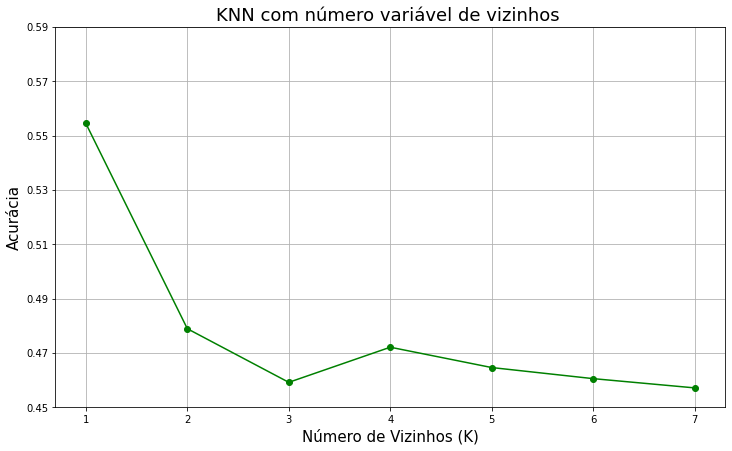

In [27]:
plt.figure(figsize=(12, 7))
plt.plot(range(1, 8), scores, color='green', marker='o')
plt.grid()
plt.title('KNN com número variável de vizinhos ', fontsize=18)
plt.xlabel('Número de Vizinhos (K)', fontsize=15)
plt.yticks(np.arange(0.45, 0.6, 0.02))
plt.ylabel('Acurácia', fontsize=15);

O melhor modelo é com **K = 1** 